<a href="https://colab.research.google.com/github/taerd/ML_lessons/blob/main/C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pygame 2.0.1 (SDL 2.0.14, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
c_radius = 2
c_color = (0,0,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)

In [ ]:
# преобразование координат
def to_matplotlib(coords,height):
    return(coords[0],height - coords[1])

In [ ]:
# рисовка и обработка событий pygame
points = np.empty((0,2), dtype='int')

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(3, 30)
        t = np.random.uniform(0, 2*np.pi)
        coord = [int(x+r*np.cos(t)), int(y+r*np.sin(t))]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

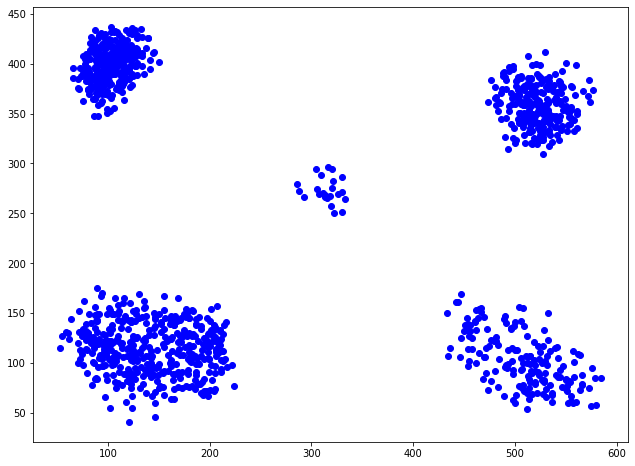

In [ ]:
# original art
points_matplot =  np.empty((0,2), dtype='int')

# перевод координат из pygame в matplotlib
for k in range(len(points)):
    new_array = np.ndarray((1,2),buffer = np.array(to_matplotlib(points[k],height)),dtype = int)
    points_matplot = np.append(points_matplot,new_array,axis=0)

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points_matplot[:,0],points_matplot[:,1],c="blue")
plt.show()
points = points_matplot

In [ ]:
class C_Means():
   
    def __init__(self, dataset, n_clusters=3, fuzzy=2, cut=.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy = fuzzy
        self.cut = cut
        self.max_n_iter = 100
        self.tolerance = 1e-2
        self.fitted = False
        self.labels = np.array([], dtype='i')
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)] + 1
        self.U = np.array([], dtype='f')
     
    # Метод для измерения расстояния между двумя объектами
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
  
    # Метод пересчета матрицы принадлежности U
    def distribute_data(self):
        dist = np.array([[self.get_dist(center,data) for center in self.centroids] \
                 for data in self.dataset])
        for i in range(0,self.dataset.shape[0]):
            for j in range(0,self.n_clusters):
                if(dist[i][j] <= 0.001):
                    dist[i][j] = 0.001
        self.U=(1/dist)**self.fuzzy
        self.U = self.U/np.array([self.U.sum(axis=1)]).T
        
        # Перерасчет labels
        self.labels=np.array([],dtype='i')
        for k in range(self.dataset.shape[0]):
            # n_clusters+1 класса (включая шум - (n_clusters) класс)
            if (self.U[k].max() >= self.cut):
                self.labels = np.append(self.labels, np.array(self.U[k].argmax()))
            else:
                self.labels = np.append(self.labels, [self.n_clusters])
                                        
                                        
    # Метод пересчета центров кластеров с помощью матрицы принадлежности
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            temp = np.zeros(self.dataset[0].shape)
            temp_sum = np.zeros(self.dataset[0].shape)
            for k.label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]* self.U[k][label]
                    temp_sum += self.U[k][label]
            #добавить незначительные смещения
            self.centroids[i] = temp/temp_sum          
      
    # Метод возврата labels
    def get_labels(self):
        return self.labels
    
    # Метод возврата centroids
    def get_centers(self):
        return self.centroids
        
    # Метод обучения модели       
    def fit(self):
        iter = 0
        while iter< self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids
            if np.array([self.get_dist(i,j) for i,j in zip(prev_centroids,self.centroids)]).max()\
            <self.tolerance:
                print(iter)
                break
            i += 1
        self.fitted = True
     
    # Метод предсказания меток для массива новых объектов
    def predict(self, list2d):
        if self.fitted == True:
            labels=np.array([],dtype='i')
            
            for data in list2d:
                dist = np.array([[self.get_dist(center,data) for center in self.centroids] \
                     for data in list2d])
            
            for i in range(len(list2d)):
                for j in range(0,self.n_clusters):
                    if(dist[i][j] <= 0.001):
                        dist[i][j] = 0.001
                        
            U=(1/dist)**self.fuzzy
            U = U/np.array([U.sum(axis=1)]).T
            for k in len(list2d):
                # n_clusters+1 класса (включая шум - (n_clusters) класс)
                if (U[k].max() >= self.cut):
                    labels = np.append(labels, np.array(U[k].argmax()))
                else:
                    labels = np.append(labels, [n_clusters])
            return labels

In [ ]:
cmeans = C_Means(dataset = points, n_clusters = 3, fuzzy = 2 , cut = 0.6)

In [ ]:
cmeans.fit()

0


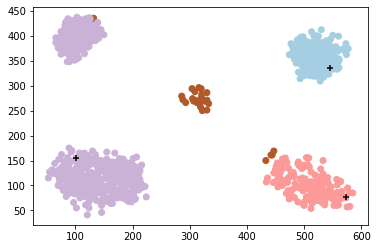

In [ ]:
plt.scatter(points[:,0],points[:,1],c=cmeans.labels,cmap=plt.cm.Paired)
plt.scatter(cmeans.centroids[:,0],cmeans.centroids[:,1],c='black',marker='+')
plt.show()